In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_benin = pd.read_csv('../data/raw/benin-malanville.csv')

In [3]:
data_benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
data_benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
data_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [7]:
data_benin['Timestamp'] = pd.to_datetime(data_benin['Timestamp'])

In [8]:
stats = data_benin.describe(include='number').transpose()
stats['median'] = data_benin.median()
print(stats)

                  count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0

In [9]:
# Replace negative values in GHI, DNI, and DHI with NaN
columns_to_clean = ['GHI', 'DNI', 'DHI']
for col in columns_to_clean:
    data_benin[col] = data_benin[col].apply(lambda x: np.nan if x < 0 else x)

In [10]:
# Drop the 'Comments' column as it is entirely null
if 'Comments' in data_benin.columns:
    data_benin.drop(columns=['Comments'], inplace=True)

In [11]:
# Check for missing values after cleaning
print(data_benin.isnull().sum())


Timestamp             0
GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64


In [ ]:
# Save the cleaned dataset to a new file
data_benin.to_csv('../data/intermediate/benin.csv', index=False)

In [13]:
# Interpolating missing values in GHI, DNI, and DHI columns using linear method
columns_to_interpolate = ['GHI', 'DNI', 'DHI']
for col in columns_to_interpolate:
    data_benin[col] = data_benin[col].interpolate(method='linear', limit_direction='both')


In [14]:
data_benin.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

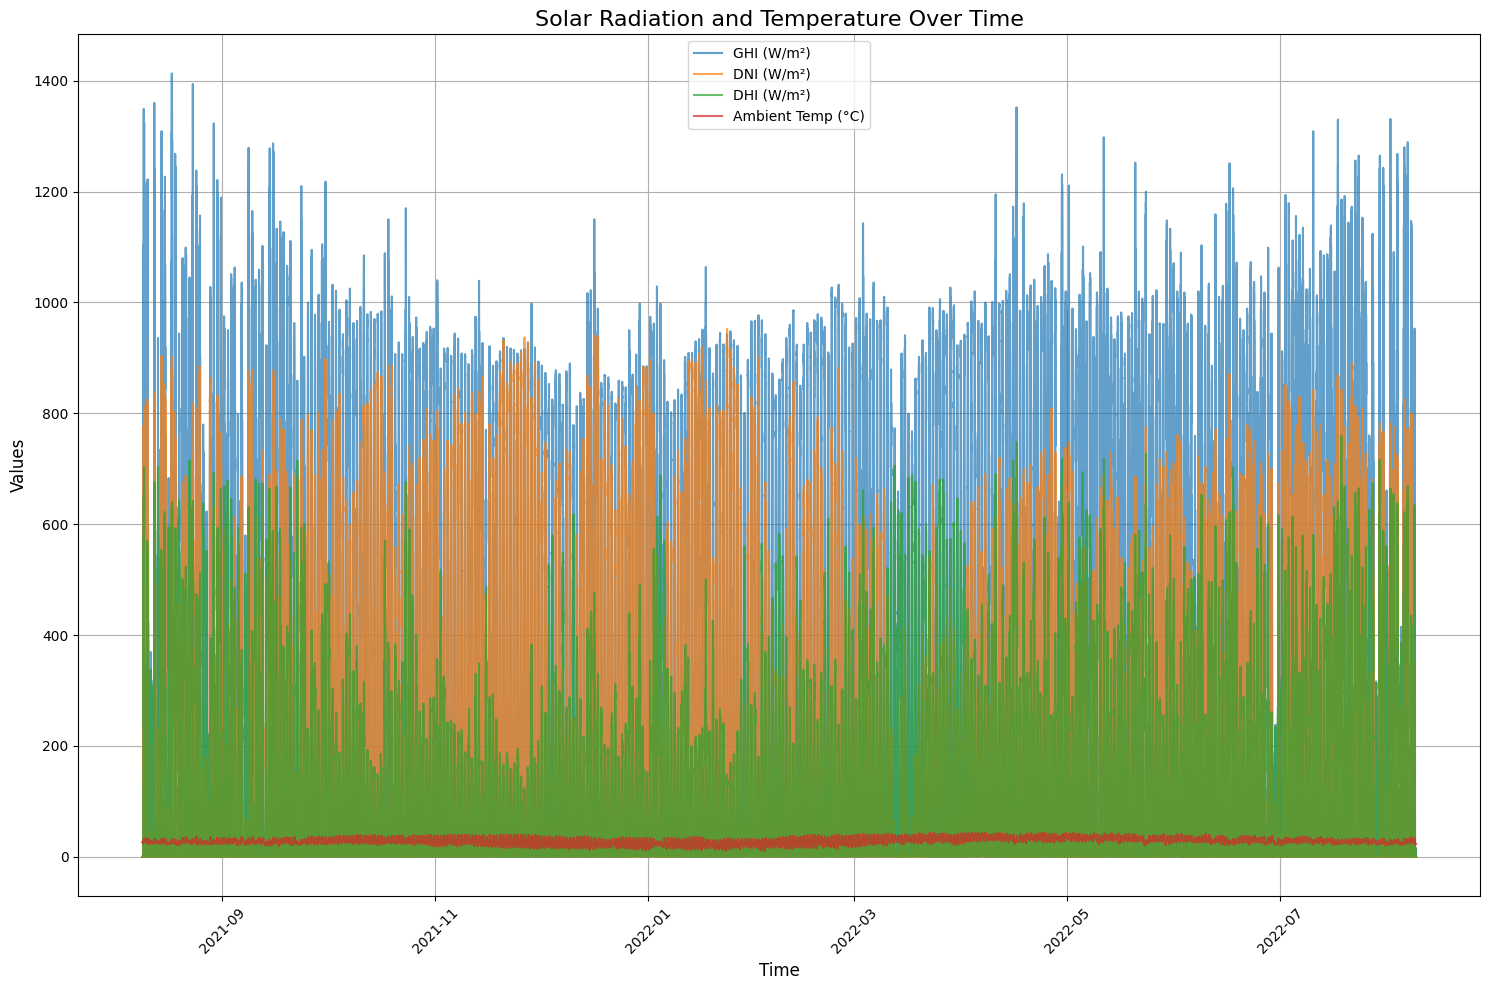

In [15]:
# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(15, 10))
plt.plot(data_benin['Timestamp'], data_benin['GHI'], label='GHI (W/m²)', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['DNI'], label='DNI (W/m²)', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['DHI'], label='DHI (W/m²)', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['Tamb'], label='Ambient Temp (°C)', alpha=0.7)
plt.title('Solar Radiation and Temperature Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

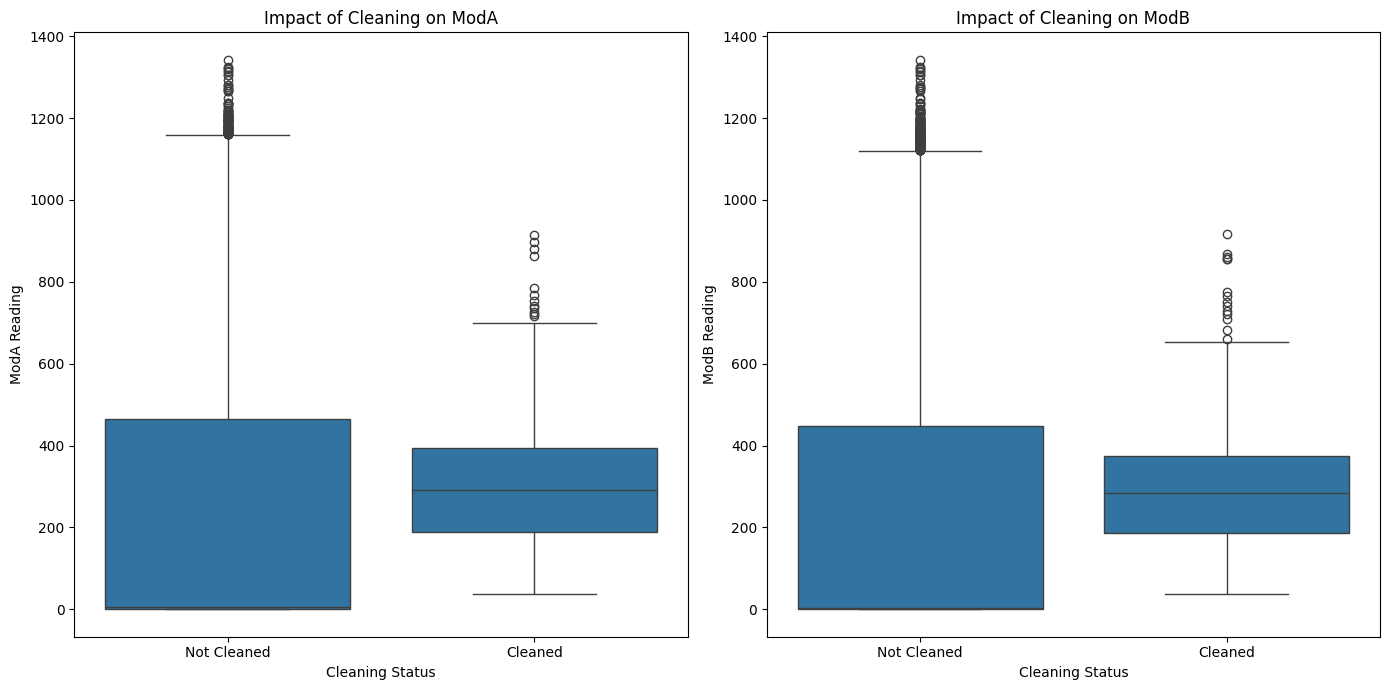

In [ ]:
# Create a 'Cleaned' column based on the Cleaning flag
data_benin['Cleaned'] = data_benin['Cleaning'].apply(lambda x: 'Cleaned' if x > 0 else 'Not Cleaned')

# Create boxplots for ModA and ModB
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cleaned', y='ModA', data=data_benin)
plt.title('Impact of Cleaning on ModA')
plt.ylabel('ModA Reading')
plt.xlabel('Cleaning Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cleaned', y='ModB', data=data_benin)
plt.title('Impact of Cleaning on ModB')
plt.ylabel('ModB Reading')
plt.xlabel('Cleaning Status')

plt.tight_layout()
plt.show()


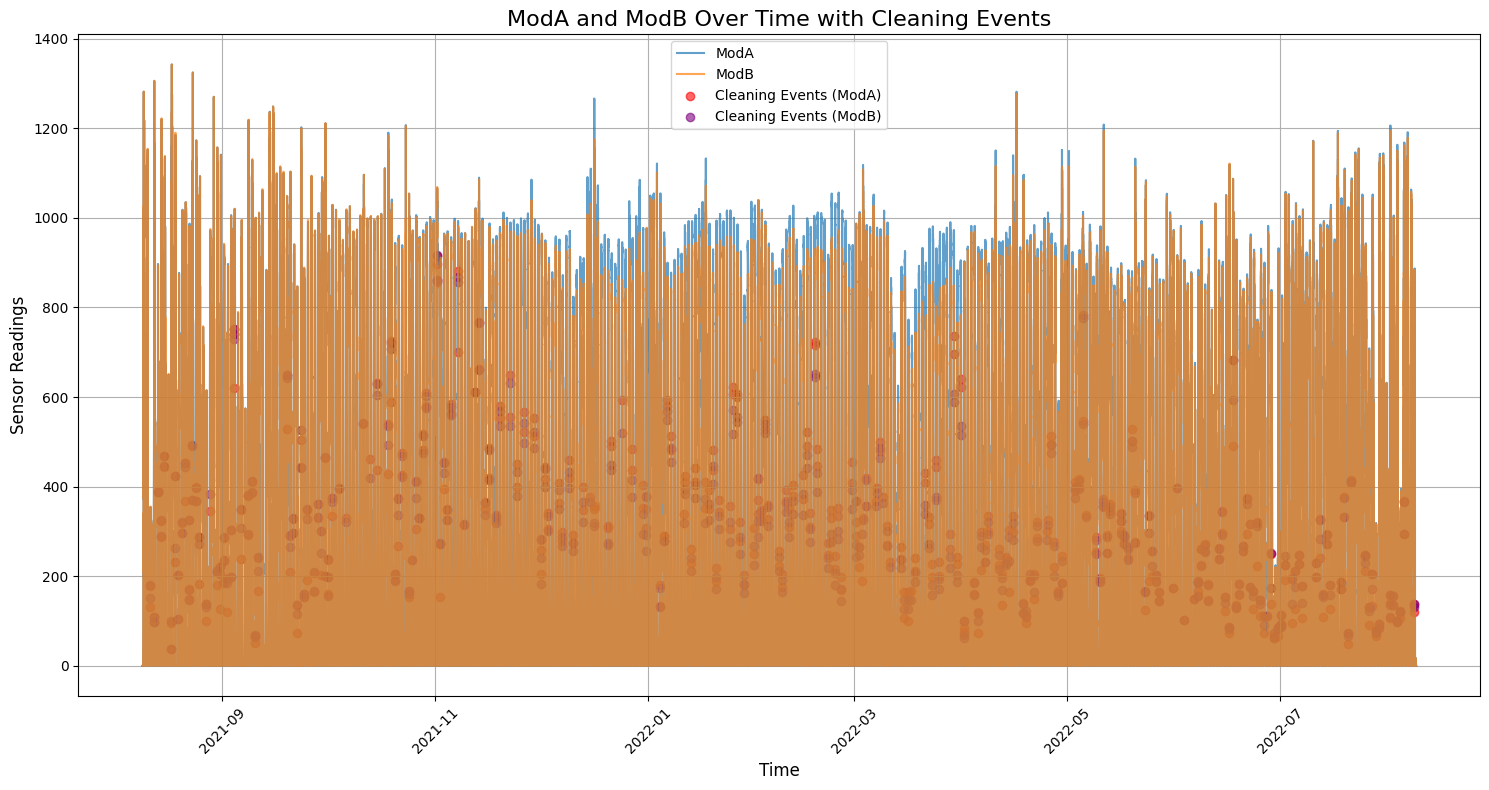

In [17]:
# Highlight cleaning periods on ModA and ModB time series
plt.figure(figsize=(15, 8))
plt.plot(data_benin['Timestamp'], data_benin['ModA'], label='ModA', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['ModB'], label='ModB', alpha=0.7)

# Highlight cleaning events
cleaning_times = data_benin[data_benin['Cleaning'] > 0]
plt.scatter(cleaning_times['Timestamp'], cleaning_times['ModA'], color='red', label='Cleaning Events (ModA)', alpha=0.6)
plt.scatter(cleaning_times['Timestamp'], cleaning_times['ModB'], color='purple', label='Cleaning Events (ModB)', alpha=0.6)
plt.title('ModA and ModB Over Time with Cleaning Events', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sensor Readings', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
